
This is the Advanced Recognition of License Plates (ARLP) Results Book.

In this book, we used the models we trained and checked the results.
The models are: ***Inception ResNet v2 and a custom Convolutional Neural Network (CNN)***. These models have been trained to recognize license plates.

To get started, simply run all the cells in the notebook. You'll be prompted to upload your own image containing a license plate. Once uploaded, the models will process the image and provide their recognition results.

At the end of the notebook, you'll find a comparison of the results obtained from both models, along with the Optical Character Recognition (OCR) detection of the license plate number.

<a target="_blank" href="https://colab.research.google.com/github/PrudhviNallagatla/Advanced-Recognition-of-License-Plates-ARLP/blob/main/ARLP_Results.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Pre-requisites

In [1]:
from IPython.display import clear_output

!pip install --upgrade tensorflow
!pip install --upgrade keras

clear_output()
print("Tensorflow and Keras are Updated.")

Tensorflow and Keras are Updated.


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
inception_model = tf.keras.models.load_model('/content/drive/MyDrive/ARLP/ARLP_InceptionResNet.keras')

In [5]:
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ARLP/ARLP_Custom_CNN_2.keras')

# Upload

In [8]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

uploaded_file_path = os.path.abspath(filename)
print("Path of the uploaded file:", uploaded_file_path)

Saving 9.jpg to 9.jpg
Path of the uploaded file: /content/9.jpg


# Processing

### Inception Model Result:

In [9]:
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/13.jpg'
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/14.jpg'
path = uploaded_file_path

def object_detection_inception(path):

    image = load_img(path)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))

    image_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    coords = inception_model.predict(test_arr)
    # coords = cnn_model.predict(test_arr)

    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image_inception, cods_inception = object_detection_inception(path)

fig = px.imshow(image_inception)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
(389, 238) (502, 276)


In [10]:
# Cropping
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods_inception[0]
roi_inception = img[ymin:ymax,xmin:xmax]

fig = px.imshow(roi_inception)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

### Custom CNN Model Result:

In [11]:
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/13.jpg'
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/14.jpg'
path = uploaded_file_path

def object_detection_cnn(path):

    image = load_img(path)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))

    image_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    # coords = inception_model.predict(test_arr)
    coords = cnn_model.predict(test_arr)

    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image_cnn, cods_cnn = object_detection_cnn(path)

fig = px.imshow(image_cnn)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
(395, 281) (521, 306)


In [12]:
# Cropping
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods_cnn[0]
roi_cnn = img[ymin:ymax,xmin:xmax]

fig = px.imshow(roi_cnn)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

# Results' Comparision of Both Models

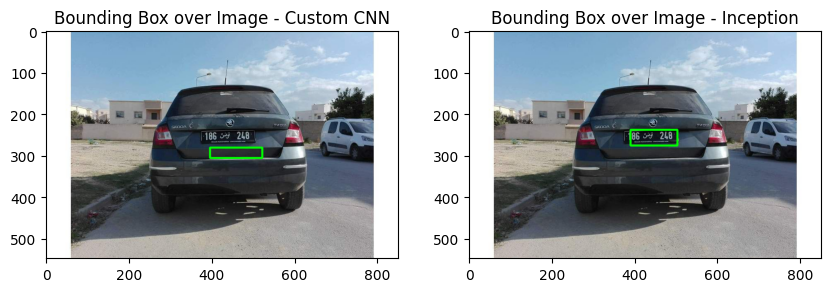

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_cnn)
axs[0].set_title('Bounding Box over Image - Custom CNN')

axs[1].imshow(image_inception)
axs[1].set_title('Bounding Box over Image - Inception')

plt.show()


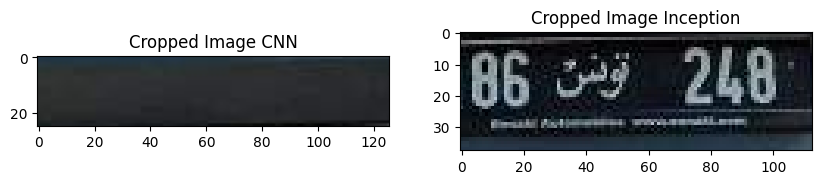

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(roi_cnn)
axs[0].set_title('Cropped Image CNN')

axs[1].imshow(roi_inception)
axs[1].set_title('Cropped Image Inception')

plt.show()

# License Number Recognition using OCR

In [22]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

!pip install easyocr

clear_output()
print("Installation of Pytesseract and Easyocr is completed.")

Installation of Pytesseract and Easyocr is completed.


In [23]:
import cv2
import numpy as np
from PIL import Image

def process_image(image):
  image_array = np.array(image)
  image_resized = cv2.resize(image_array, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
  image_resized_pil = Image.fromarray(image_resized)
  image_resized_gray = image_resized_pil.convert("L")
  gaussian_blur_image = cv2.GaussianBlur(np.array(image_resized_gray), (5, 5), 0)
  blurred_image_pil = Image.fromarray(gaussian_blur_image)
  return blurred_image_pil

blurred_image = process_image(roi_inception)

fig = px.imshow(blurred_image)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

### Result of Tesseract OCR

In [24]:
import pytesseract

pytesseract_text = pytesseract.image_to_string(blurred_image)
print(f"Result of Tesseract OCR: {pytesseract_text}")

Detected text:
Cee



### Result of EasyOCR

In [26]:
import easyocr

reader = easyocr.Reader(['en'])

In [32]:
easyocr_reader_result = reader.readtext(roi_inception)

easyocr_text = ""
for detection in easyocr_reader_result:
    text = detection[1]
    easyocr_text += text
    confidence = detection[2]
    print(f"Detected text: {text}, Confidence: {confidence}")

print("\nResult of EasyOCR:", easyocr_text)


Detected text: 86 3 3, Confidence: 0.04240382647921162
Detected text: 240, Confidence: 0.7435041049615079

Result of EasyOCR: 86 3 3240


# Results' Comparision of both OCRs

In [33]:
# Comparision between TesseractOCR and EasyOCR
print(f"Result of Tesseract OCR: {pytesseract_text}")
print(f"Result of EasyOCR: {easyocr_text}")

Result of Tesseract OCR: Cee

Result of EasyOCR: 86 3 3240


In [ ]:
#...